# The Contamination Parameter

#### PROBLEM: a hard coded percentage of points is always labeled as anomalies irrespective of how far these points truly are from the rest of the data

In [1]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import chart_studio.plotly as py
import matplotlib.pyplot as plt
from matplotlib import pyplot
import plotly.graph_objs as go
import plotly.graph_objs as go
import warnings
from scipy import stats

In [2]:
#import data frame

full_df=pd.read_csv('ec2_cpu_utilization_5f5533.csv')
full_df.head(5)

,timestamp,value
0,2014-02-14 14:27:00,51.846
1,2014-02-14 14:32:00,44.508
2,2014-02-14 14:37:00,41.244
3,2014-02-14 14:42:00,48.568
4,2014-02-14 14:47:00,46.714


In [3]:
# visualize data

init_notebook_mode(connected=True)

fig = go.Figure(data=[go.Scatter(x=full_df['timestamp'], y=full_df['value'])])
iplot(fig)

In [4]:
# data frame

df=full_df.loc[(full_df['timestamp'] > '2014-02-24 00:00:00') 
               & (full_df['timestamp'] < '2014-02-24 23:59:59')]
df

,timestamp,value
2707,2014-02-24 00:02:00,43.024
2708,2014-02-24 00:07:00,45.128
2709,2014-02-24 00:12:00,39.578
2710,2014-02-24 00:17:00,47.302
2711,2014-02-24 00:22:00,43.474
...,...,...
2990,2014-02-24 23:37:00,37.300
2991,2014-02-24 23:42:00,40.328
2992,2014-02-24 23:47:00,36.830
2993,2014-02-24 23:52:00,38.458


<AxesSubplot:xlabel='timestamp', ylabel='value'>

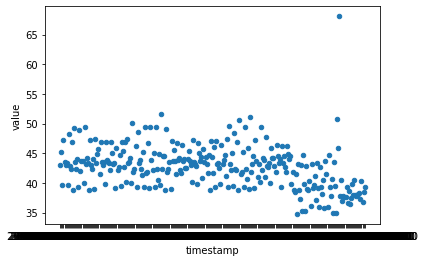

In [5]:
# visualization of data 

df.plot.scatter('timestamp', 'value')

In [6]:
#assign SCORES based on iForest algorithm

warnings.filterwarnings('ignore')

model=IsolationForest(n_estimators=10, max_samples='auto', 
                      contamination=float(0.1), max_features=1.0, 
                      bootstrap=False, n_jobs=-1, random_state=42, 
                      verbose=0)
model.fit(df[['value']])

df['scores']=model.decision_function(df[['value']])

df

,timestamp,value,scores
2707,2014-02-24 00:02:00,43.024,0.149105
2708,2014-02-24 00:07:00,45.128,0.019262
2709,2014-02-24 00:12:00,39.578,0.135164
2710,2014-02-24 00:17:00,47.302,0.013920
2711,2014-02-24 00:22:00,43.474,0.173865
...,...,...,...
2990,2014-02-24 23:37:00,37.300,0.006282
2991,2014-02-24 23:42:00,40.328,0.178537
2992,2014-02-24 23:47:00,36.830,-0.066549
2993,2014-02-24 23:52:00,38.458,0.110284


#### NOTE: The contamination factor has no influence on the DISTRIBUTION of the scores

## What We Did Before

In [7]:
# use model.predict to detect anomalies -- this is hypersenstive to the set contamination level of 0.1

df['anomaly']=model.predict(df[['value']])
df['anomaly']=(df['anomaly'] == -1) 
df['anomaly']=df['anomaly'].astype(int)

anomalies_detected=df.loc[df['anomaly'] == 1]
anomalies_detected

,timestamp,value,scores,anomaly
2715,2014-02-24 00:42:00,48.216,-0.044777,1
2720,2014-02-24 01:07:00,49.226,-0.000906,1
2725,2014-02-24 01:32:00,48.944,-0.051011,1
2770,2014-02-24 05:17:00,47.442,-0.016032,1
2775,2014-02-24 05:42:00,50.066,-0.059050,1
2780,2014-02-24 06:07:00,48.500,-0.031303,1
2802,2014-02-24 07:57:00,51.658,-0.145314,1
2807,2014-02-24 08:22:00,49.138,-0.017646,1
2871,2014-02-24 13:42:00,48.480,-0.031303,1
2876,2014-02-24 14:07:00,50.634,-0.051011,1


Percentage of anomalies in data: 10.07


<AxesSubplot:xlabel='timestamp', ylabel='value'>

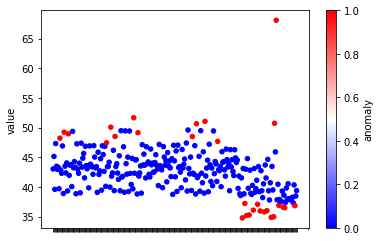

In [8]:
#visualization of anomalies

print("Percentage of anomalies in data: {:.2f}".format((len(df.loc[df['anomaly']== 1])/len(df))*100))
df.plot.scatter('timestamp', 'value', c='anomaly', colormap='bwr')

#### PROBLEM: a hard coded percentage of points is always labeled as anomalies irrespective of how far these points truly are from the rest of the data.

#### SOLUTION: we can use a statistical algorithm like IQR or Z-Score on the scores to detect those changes in scores and classify anomalies better.

## IQR

In [9]:
#use IQR or scores to detect anomalies

def iqr_bounds(scores,k=1.5):
    q1 = scores.quantile(0.25)
    q3 = scores.quantile(0.75)
    iqr = q3 - q1
    lower_bound=(q1 - (k * iqr))
    upper_bound=(q3 + (k * iqr))
    return lower_bound,upper_bound

lower_bound,upper_bound=iqr_bounds(df['scores'],k=1.5) # change k based on desired sensitivity

df['anomaly']= 0
df['anomaly']= ((df['scores'] < lower_bound)|(df['scores'] > upper_bound)).astype(int)

anomalies_detected=df.loc[df['anomaly'] == 1]
anomalies_detected

,timestamp,value,scores,anomaly
2715,2014-02-24 00:42:00,48.216,-0.044777,1
2725,2014-02-24 01:32:00,48.944,-0.051011,1
2775,2014-02-24 05:42:00,50.066,-0.059050,1
2802,2014-02-24 07:57:00,51.658,-0.145314,1
2876,2014-02-24 14:07:00,50.634,-0.051011,1
2886,2014-02-24 14:57:00,51.042,-0.098736,1
2901,2014-02-24 16:12:00,47.678,-0.096492,1
2930,2014-02-24 18:37:00,34.766,-0.146314,1
2935,2014-02-24 19:02:00,35.174,-0.081878,1
2938,2014-02-24 19:17:00,35.254,-0.090714,1


Percentage of anomalies in data: 7.99


<AxesSubplot:xlabel='timestamp', ylabel='value'>

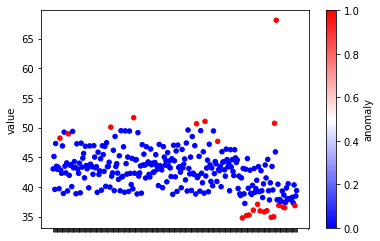

In [10]:
#visualization of anomalies

print("Percentage of anomalies in data: {:.2f}".format((len(df.loc[df['anomaly']==1])/len(df))*100))
df.plot.scatter('timestamp', 'value', c='anomaly', colormap='bwr')

## Z-Score

In [11]:
#use Z-Score of scores to detect anomalies

k = 3 # change k based on desired sensitivity
z_scores = stats.zscore(df['scores'])
df['anomaly']= 0
df['anomaly'] = ((z_scores > k) | (z_scores < -k)).astype(int)
    
anomalies_detected=df.loc[df['anomaly'] == 1]
anomalies_detected

,timestamp,value,scores,anomaly
2802,2014-02-24 07:57:00,51.658,-0.145314,1
2930,2014-02-24 18:37:00,34.766,-0.146314,1
2970,2014-02-24 21:57:00,68.092,-0.295027,1


Percentage of anomalies in data: 1.04


<AxesSubplot:xlabel='timestamp', ylabel='value'>

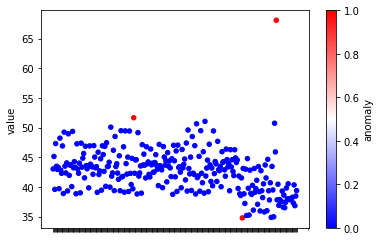

In [12]:
print("Percentage of anomalies in data: {:.2f}".format((len(df.loc[df['anomaly']==1])/len(df))*100))
df.plot.scatter('timestamp', 'value', c='anomaly', colormap='bwr')

## K Value

The K parameter in IQR and Z-Score methods can be tuned based on feedback on anomalies detected. If there are false positives then k should be increased to find less anomalies and if there are false negatives k should be decreased to find more anomalies.

## Resources Used:

* Anomaly Detection : Isolation Forest with Statistical Rules by Krishnan 2019: https://towardsdatascience.com/isolation-forest-with-statistical-rules-4dd27dad2da9
* Isolation-based Anomaly Detection by Liu, Ting, and Zhou 2012: https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/tkdd11.pdf
* GitHub: https://github.com/scikit-learn/scikit-learn/blob/fd237278e895b42abe8d8d09105cbb82dc2cbba7/sklearn/ensemble/_iforest.py#L228